In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore') 
%matplotlib inline

In [3]:
# Weather Data read from 'weatherHistory.csv' file

data = pd.read_csv('weatherHistory.csv')
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
data.shape


(96453, 12)

In [5]:
data.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [8]:
#Data formatting for date.

data['Formatted Date'] = pd.to_datetime(data['Formatted Date'],utc= True)
data['Formatted Date']

0       2006-03-31 22:00:00+00:00
1       2006-03-31 23:00:00+00:00
2       2006-04-01 00:00:00+00:00
3       2006-04-01 01:00:00+00:00
4       2006-04-01 02:00:00+00:00
5       2006-04-01 03:00:00+00:00
6       2006-04-01 04:00:00+00:00
7       2006-04-01 05:00:00+00:00
8       2006-04-01 06:00:00+00:00
9       2006-04-01 07:00:00+00:00
10      2006-04-01 08:00:00+00:00
11      2006-04-01 09:00:00+00:00
12      2006-04-01 10:00:00+00:00
13      2006-04-01 11:00:00+00:00
14      2006-04-01 12:00:00+00:00
15      2006-04-01 13:00:00+00:00
16      2006-04-01 14:00:00+00:00
17      2006-04-01 15:00:00+00:00
18      2006-04-01 16:00:00+00:00
19      2006-04-01 17:00:00+00:00
20      2006-04-01 18:00:00+00:00
21      2006-04-01 19:00:00+00:00
22      2006-04-01 20:00:00+00:00
23      2006-04-01 21:00:00+00:00
24      2006-04-09 22:00:00+00:00
25      2006-04-09 23:00:00+00:00
26      2006-04-10 00:00:00+00:00
27      2006-04-10 01:00:00+00:00
28      2006-04-10 02:00:00+00:00
29      2006-0

In [11]:
data.isnull().sum()

#Checking for the nan values 

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [13]:
#Now we need to find Avgerage temp. and humidity 
# of the specific months from 2006-16.
# (1) Now formatted date as our index due to the
#     need of every moonth data of particular year.


data = data.set_index('Formatted Date')
data.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [15]:
# (2) Now We need only 2 columns from our Data.
#     so will fetched that columns only. 

cols = data[['Apparent Temperature (C)','Humidity']] 
data_avg = cols.resample('MS').mean()

# "MS" ==> Month starting 
# We are actually displaying the avg apparent 
# temperature (C) and humidity using mean().

data_avg.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625


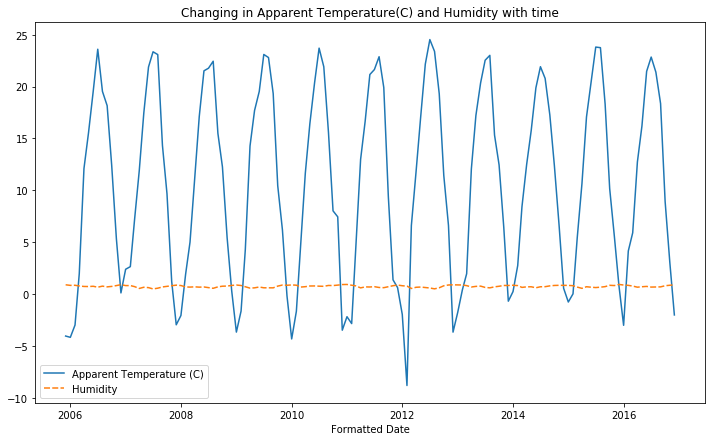

In [17]:
# (3) Now We will plot both value with respect to datetime 
#     i.e. index column to check variation in data.


plt.figure(figsize=(12,7))
plt.title("Changing in Apparent Temperature(C) and Humidity with time")
sns.lineplot(data=data_avg);


In [18]:
# (4) Now we will find particular month that's April' as per question. 
# we will extract only April month data using index.month = 4.

data1 = data_avg[data_avg.index.month==4]
data1

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-04-01 00:00:00+00:00,12.098827,0.728625
2007-04-01 00:00:00+00:00,11.894421,0.536361
2008-04-01 00:00:00+00:00,11.183688,0.693194
2009-04-01 00:00:00+00:00,14.267076,0.567847
2010-04-01 00:00:00+00:00,11.639406,0.706875
2011-04-01 00:00:00+00:00,12.978997,0.591625
2012-04-01 00:00:00+00:00,11.782770,0.650222
2013-04-01 00:00:00+00:00,12.045563,0.677667
2014-04-01 00:00:00+00:00,12.486181,0.691403


In [19]:
import matplotlib.dates as dts

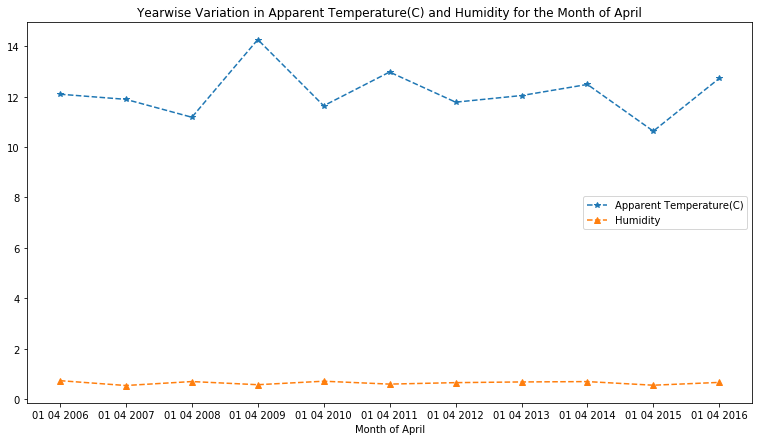

In [21]:
# Now we will subplot the 2 variable with respect to index value. 

fig, st = plt.subplots(figsize = (13,7))

st.plot(data1.loc['2006-04-01':'2016-04-01', 'Apparent Temperature (C)'],marker='*', linestyle='--',label='Apparent Temperature(C)');
st.plot(data1.loc['2006-04-01':'2016-04-01', 'Humidity'],marker='^', linestyle='--',label='Humidity');
st.set_xticks(['04-01-2006','04-01-2007','04-01-2008','04-01-2009',
               '04-01-2010','04-01-2011','04-01-2012','04-01-2013','04-01-2014','04-01-2015','04-01-2016'])

st.xaxis.set_major_formatter(dts.DateFormatter('%d %m %Y'))
st.set_xlabel('Month of April')
st.legend(loc = 'center right')
plt.title("Yearwise Variation in Apparent Temperature(C) and Humidity for the Month of April");

In [22]:
# CONCLUSION:-

# (A) Average Apparent Temperature (c) increase for year 2008-09 
#     and then again decrease from 2009-10 to its average level. 
#     Then slighlty increase for period 2010-11 and then drop
#     again for year 2011-12. For year 2014-15 it decrease
#     drastically and then come to average level for year 2015-16.
#
# (B) It observed, for year 2009 the Apparent Temperature is at
#     Highest 14.26(C) and for year 2015 the Apparent Temperature 
#     is at lowest 10.63(C).
#
#
# (C) There is no any change in average Humidity for given year
#     2006-2016. The humidity graph line is approximately parallel 
#     to the X-axis.
